<a href="https://colab.research.google.com/github/gang21/ML-DrugDesign/blob/main/ML_Finding_a_Natural_Product_for_Monkeypox_Inhibition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as torch

In [2]:
%%bash
add-apt-repository ppa:ubuntu-toolchain-r/test
apt-get update --fix-missing
apt-get dist-upgrade
wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
chmod +x Miniconda3-latest-Linux-x86_64.sh
./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
conda config --set always_yes yes --set changeps1 no 
conda install -q -y -c conda-forge python=3.7 conda=4.9.2 
conda install -q -y -c conda-forge rdkit conda=4.9.2 

 Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

 More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu b

--2022-08-17 17:52:41--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2022-08-17 17:52:41--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76607678 (73M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 68.4M 1s
    50K .......... .......... .......... .......... ..........

In [3]:
!pip install git+https://github.com/bp-kelley/descriptastorus
!pip install deeppurpose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-6ad11ckh
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-6ad11ckh
  Resolved https://github.com/bp-kelley/descriptastorus to commit baed6a56d63dd27c1bc5f6924a7c9e0d48594012
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.2/845.2 kB 18.0 MB/s eta 0:00:00
  Created wheel for descriptastorus: filename=descriptastorus-2.3.0.6-py3-none-any.whl size=60682 sha256=3a38dbb503b30eec1dcd4b7ab5a7c1ae5abf7d6550efb04d3ebfa005aa2cd01a
  Stored in directory: /tmp/pip-ephem-wheel-cache-jyzc4mnu/wheels/f9/c3/4f/e7d01f4f2f1a89aef8f0ef088beb4a94976324f3ee21410b10
Successfully built descriptastorus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# %%bash
# conda config --set always_yes yes --set changeps1 no 
# conda install -q -y -c conda-forge python=3.7 conda=4.9.2 
# conda install -q -y -c conda-forge rdkit conda=4.9.2 

Process is terminated.


In [4]:
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.8/36.8 MB 27.2 MB/s eta 0:00:00


In [5]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

try:
  from rdkit import Chem
  from rdkit.Chem.Draw import IPythonConsole
except ImportError:
  print('Stopping RUNTIME. Colaboratory will restart automatically. Please run cell again.')
  exit()

In [6]:
!sed 's/MAX_ATOM = 400/MAX_ATOM = 800/g' /usr/local/lib/python3.7/site-packages/DeepPurpose/utils.py > /usr/local/lib/python3.7/site-packages/DeepPurpose/utils1.py
!cp /usr/local/lib/python3.7/site-packages/DeepPurpose/utils1.py /usr/local/lib/python3.7/site-packages/DeepPurpose/utils.py

In [7]:
from DeepPurpose import utils, dataset
from DeepPurpose import DTI as models
import warnings
warnings.filterwarnings("ignore")

In [8]:
from google.colab import drive

drive.mount('/content/MyDrive') 

Mounted at /content/MyDrive


In [9]:
from DeepPurpose.utils1 import *
from DeepPurpose.dataset import *
SAVE_PATH="collabDrive/MyDrive/Summer 2022 Internship"

In [10]:
pdbFiles = "/content/MyDrive/MyDrive/Summer 2022 Internship/BindingDB_All_Oracle/BindingDB_All.tsv"

In [11]:
X_drug, X_target, y  = process_BindingDB(pdbFiles, y = 'IC50',  binary = False,  convert_to_log = True)

Loading Dataset from path...


b'Skipping line 1087314: expected 193 fields, saw 205\nSkipping line 1087340: expected 193 fields, saw 205\n'
b'Skipping line 1120033: expected 193 fields, saw 205\n'
b'Skipping line 1142701: expected 193 fields, saw 265\n'
b'Skipping line 1546347: expected 193 fields, saw 241\n'
b'Skipping line 1660234: expected 193 fields, saw 241\nSkipping line 1660235: expected 193 fields, saw 241\nSkipping line 1660236: expected 193 fields, saw 241\nSkipping line 1660237: expected 193 fields, saw 241\nSkipping line 1660238: expected 193 fields, saw 241\nSkipping line 1660239: expected 193 fields, saw 241\nSkipping line 1660240: expected 193 fields, saw 241\nSkipping line 1660241: expected 193 fields, saw 241\nSkipping line 1660242: expected 193 fields, saw 241\n'
b'Skipping line 1673507: expected 193 fields, saw 205\n'
b'Skipping line 1692730: expected 193 fields, saw 241\nSkipping line 1692731: expected 193 fields, saw 241\nSkipping line 1692732: expected 193 fields, saw 241\nSkipping line 169273

Beginning Processing...
There are 1410782 drug target pairs.
Default set to logspace (nM -> p) for easier regression


In [12]:
for a,b,c in zip( X_drug[:5], X_target[:5], y[:5] ):
  print (c,b,a,'\n')

4.301029995663981 MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPFLGNILSYHKGFCMFDMECHKKYGKVWGFYDGQQPVLAITDPDMIKTVLVKECYSVFTNRRPFGPVGFMKSAISIAEDEEWKRLRSLLSPTFTSGKLKEMVPIIAQYGDVLVRNLRREAETGKPVTLKDVFGAYSMDVITSTSFGVNIDSLNNPQDPFVENTKKLLRFDFLDPFFLSITVFPFLIPILEVLNICVFPREVTNFLRKSVKRMKESRLEDTQKHRVDFLQLMIDSQNSKETESHKALSDLELVAQSIIFIFAGYETTSSVLSFIMYELATHPDVQQKLQEEIDAVLPNKAPPTYDTVLQMEYLDMVVNETLRLFPIAMRLERVCKKDVEINGMFIPKGVVVMIPSYALHRDPKYWTEPEKFLPERFSKKNKDNIDPYIYTPFGSGPRNCIGMRFALMNMKLALIRVLQNFSFKPCKETQIPLKLSLGGLLQPEKPVVLKVESRDGTVSGA Cc1nc(CN2CCN(CC2)c2c(Cl)cnc3[nH]c(nc23)-c2cn(C)nc2C)no1 

5.175425128150733 MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTDYNQGLVLPMALELMTVLVGSPRKDGLVSLLTTSEGADEPQRLQFPLPTAQRSLEPGTPRWANYVKGVIQYYPAAPLPGFSAVVVSSVPLGGGLSSSASLEVATYTFLQQLCPDSGTIAARAQVCQQAEHSFAGMPCGIMDQFISLMGQKGHALLIDCRSLETSLVPLSDPKLAVLITNSNVRHSLASSEYPVRRRQCEEVARALGKESLREVQLEELEAARDLVSKEGFRRARHVVGEIRRTAQAAAALRRGDYRAFGRLMVESHRSLRDDYEVSCPELDQLVEAALAVPGVYGSRMTGGGFGGCTVTLLEASAAPHAMRHIQEHYGGTATFYLSQAADGAKVLCL O=C1CCCC2

Text(0.5, 0, 'IC50')

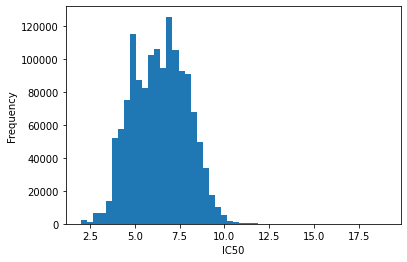

In [13]:
import numpy as np 
from matplotlib import pyplot as plt 
import pandas as pd

# Plot the figure.
counts, bins = np.histogram(y,bins=50)
fig, ax = plt.subplots()
rects1 = ax.hist( bins[:-1], bins, weights=counts)
ax.set_ylabel("Frequency")
ax.set_xlabel("IC50")

In [14]:
from DeepPurpose import DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import DeepPurpose
#drug_encoding, target_encoding = 'CNN', 'CNN'

drug_encoding, target_encoding = 'Morgan','AAC'

In [15]:
# Data processing, here we select cold protein split setup.
train, val, test = data_process(X_drug, X_target, y, 
                                drug_encoding, target_encoding, frac=[0.7,0.1,0.2])
                                #split_method='cold_protein', 

Drug Target Interaction Prediction Mode...
in total: 1410782 drug-target pairs
encoding drug...
unique drugs: 689813
rdkit not found this smiles for morgan: CC(C)(C)OC(=O)N1CC(=O)N(C(=O)C1)c1ccc(cc1)N1CC(COC(=O)[N]2=CC=C(Cl)S2)OC1=O convert to all 0 features
rdkit not found this smiles for morgan: CSc1ccc(cc1)C1=C(C=C[N]([O-])=C1)[C@@H]1CCC(F)(F)C[C@H]1C(=O)NCC#N convert to all 0 features
rdkit not found this smiles for morgan: O=C1NC(=O)c2c1c1c3ccccc3n3[Ru](C#[O])[n+]4cccc2c4c13 convert to all 0 features
rdkit not found this smiles for morgan: CN1C(=O)c2c(C1=O)c1cc(F)c[n+]3[Ru](C#[O])n4c5ccc(O)cc5c2c4c13 convert to all 0 features
rdkit not found this smiles for morgan: CCC=[C]1=CC=C(C=C1)N1CC(C1)Oc1ccc(cc1)[C@H](C)NC(=O)c1ccncc1 convert to all 0 features
rdkit not found this smiles for morgan: NOOSc1ccc(CC[N]23CC4=CC=CC=[N]4[Re+]2[N]2=C(C3)C=CC=C2)cc1 convert to all 0 features
rdkit not found this smiles for morgan: NOOSc1ccc(CC[N@@]23CC(=O)O[Re]2[N]2=C(C3)C=CC=C2)cc1 convert to all 0

In [16]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 10,
                         cnn_drug_filters = [32,64,96],
                         cnn_drug_kernels = [4,8,12],      
                         LR = 0.001, 
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )
cnnModel = models.model_initialize(**config)


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 44.2064. Total time 0.00222 hours
Training at Epoch 1 iteration 100 with loss 1.49616. Total time 0.005 hours
Training at Epoch 1 iteration 200 with loss 1.42353. Total time 0.00805 hours
Training at Epoch 1 iteration 300 with loss 1.64022. Total time 0.01111 hours
Training at Epoch 1 iteration 400 with loss 1.29025. Total time 0.01388 hours
Training at Epoch 1 iteration 500 with loss 1.31839. Total time 0.01694 hours
Training at Epoch 1 iteration 600 with loss 1.36546. Total time 0.01972 hours
Training at Epoch 1 iteration 700 with loss 1.00044. Total time 0.02277 hours
Training at Epoch 1 iteration 800 with loss 1.11819. Total time 0.02555 hours
Training at Epoch 1 iteration 900 with loss 1.16825. Total time 0.02833 hours
Training at Epoch 1 iteration 1000 with loss 1.17583. Total time 0.03138 hours
Training at Epoch 1 iteration 1100 with loss 1.13759. Total time 0.03416 hours


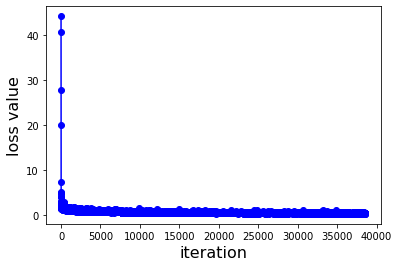

In [17]:
cnnModel.train(train, val, test)

In [18]:
# if this is a training process then un-comment the operation save_model below
SAVE_MODEL="/content/drive/MyDrive/Summer 2022 Internship/Morgan"
cnnModel.save_model( SAVE_MODEL )

In [19]:
# if this is just a prediction process then run the command below
# LOAD_MODEL="/content/drive/MyDrive/Summer 2022 Internship/Morgan/model.pt"
# cnnModel.load_pretrained( LOAD_MODEL )

In [ ]:
import json

oldNaturalDF = pd.read_csv('collabDrive/MyDrive/COCONUT/naturalProduct.csv')
naturalDF = pd.read_csv('collabDrive/MyDrive/COCONUT/COCONUT_DB.csv',sep='\t')
# Using readlines()
protFile = open('collabDrive/MyDrive/COCONUT/protein_snTox3.txt', 'r')
Lines = protFile.readlines()
targetProt = json.loads( Lines[0] )
naturalDF= naturalDF.fillna('N/A')
naturalDF.head()